<a href="https://colab.research.google.com/github/shachi-i/Financial-market-analysis-for-AI-companies./blob/main/Financial_market_analysis_for_AI_companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

In [23]:
df=pd.read_csv('/content/ai_financial_market_daily_realistic_synthetic.csv')

EDA

In [24]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [26]:
df['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [27]:
df['Event'].value_counts()
df.isnull().sum()

,0
Date,0
Company,0
R&D_Spending_USD_Mn,0
AI_Revenue_USD_Mn,0
AI_Revenue_Growth_%,0
Event,10726
Stock_Impact_%,0


In [28]:
print("Company's spending for R & D")

RnD = df.groupby('Company')['R&D_Spending_USD_Mn'].sum()

RnD

Company's spending for R & D


,R&D_Spending_USD_Mn
Company,
Google,423341.14
Meta,264533.07
OpenAI,26482.77


In [29]:
import matplotlib.pyplot as plt

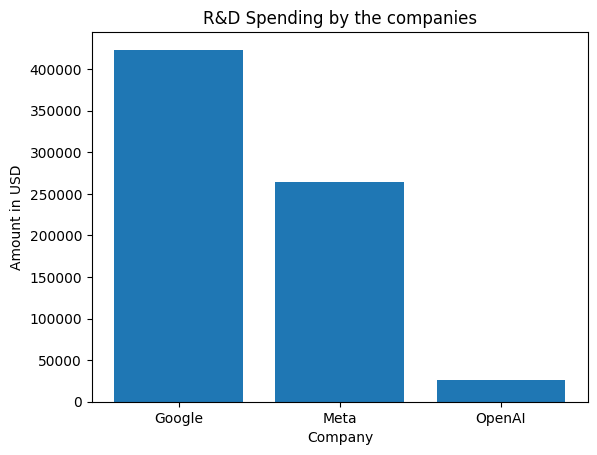

In [30]:
plt.bar(RnD.index, RnD.values)

plt.title( "R&D Spending by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD")

plt.show()

In [31]:
print("Company's AI Revenue in USD :")

revenue = df.groupby('Company')['AI_Revenue_USD_Mn'].sum()

revenue

Company's AI Revenue in USD :


,AI_Revenue_USD_Mn
Company,
Google,284498.38
Meta,189621.82
OpenAI,9462.89


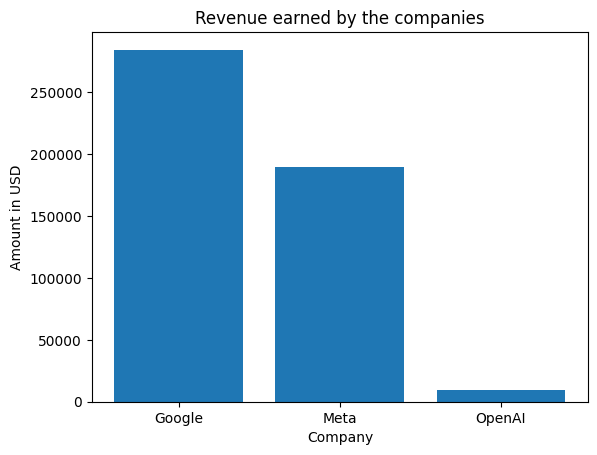

In [32]:
plt.bar(revenue.index, revenue.values)

plt.title( "Revenue earned by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD")

plt.show()

Analysing stock impact percentage

In [33]:
df['Event'].value_counts()

,count
Event,
AI speech recognition release,37
AI Ads Optimization upgrade,32
AI partnership deal,32
AI-powered search update,32
AI Video Recommendation upgrade,29
AI ethics policy update,27
Cloud AI launch,27
GPT-1 release,1
GPT-2 release,1


In [34]:
df.sort_values(by="Stock_Impact_%", ascending=False)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
3408,2024-05-01,OpenAI,10.91,5.34,434.27,GPT-5 release (predicted),18.50
2994,2023-03-14,OpenAI,7.78,4.05,304.57,GPT-4 release,15.20
2890,2022-11-30,OpenAI,10.60,3.18,217.72,ChatGPT (GPT-3.5) launch,12.00
2652,2022-04-06,OpenAI,9.24,3.48,247.93,DALL·E 2 release,9.80
1988,2020-06-11,OpenAI,5.90,2.62,161.56,GPT-3 release,8.50
...,...,...,...,...,...,...,...
5479,2020-01-01,Google,117.24,74.82,149.41,AI partnership deal,-2.93
1303,2018-07-27,OpenAI,7.44,0.97,-2.63,AI-powered search update,-2.95
2480,2021-10-16,OpenAI,8.39,2.78,178.28,AI Ads Optimization upgrade,-2.98
10785,2024-07-11,Meta,100.78,102.92,414.60,AI ethics policy update,-2.99


In [35]:
import seaborn as sns

<Axes: title={'center': 'Most impactful event that affected stock percentage'}, xlabel='Event', ylabel='Change in Stock %'>

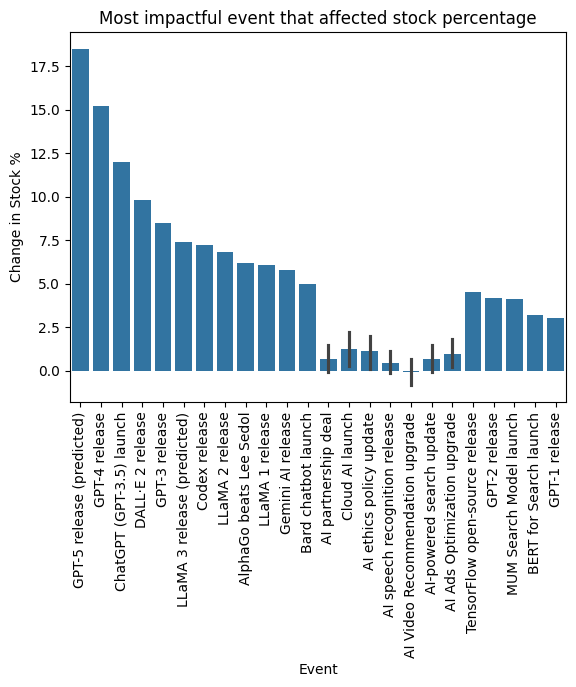

In [36]:
plt.title("Most impactful event that affected stock percentage")
plt.xticks(rotation=90)
plt.ylabel("Change in Stock %")
sns.barplot(data=df.sort_values(by="Stock_Impact_%", ascending=False), x="Event", y="Stock_Impact_%")

revenue growth

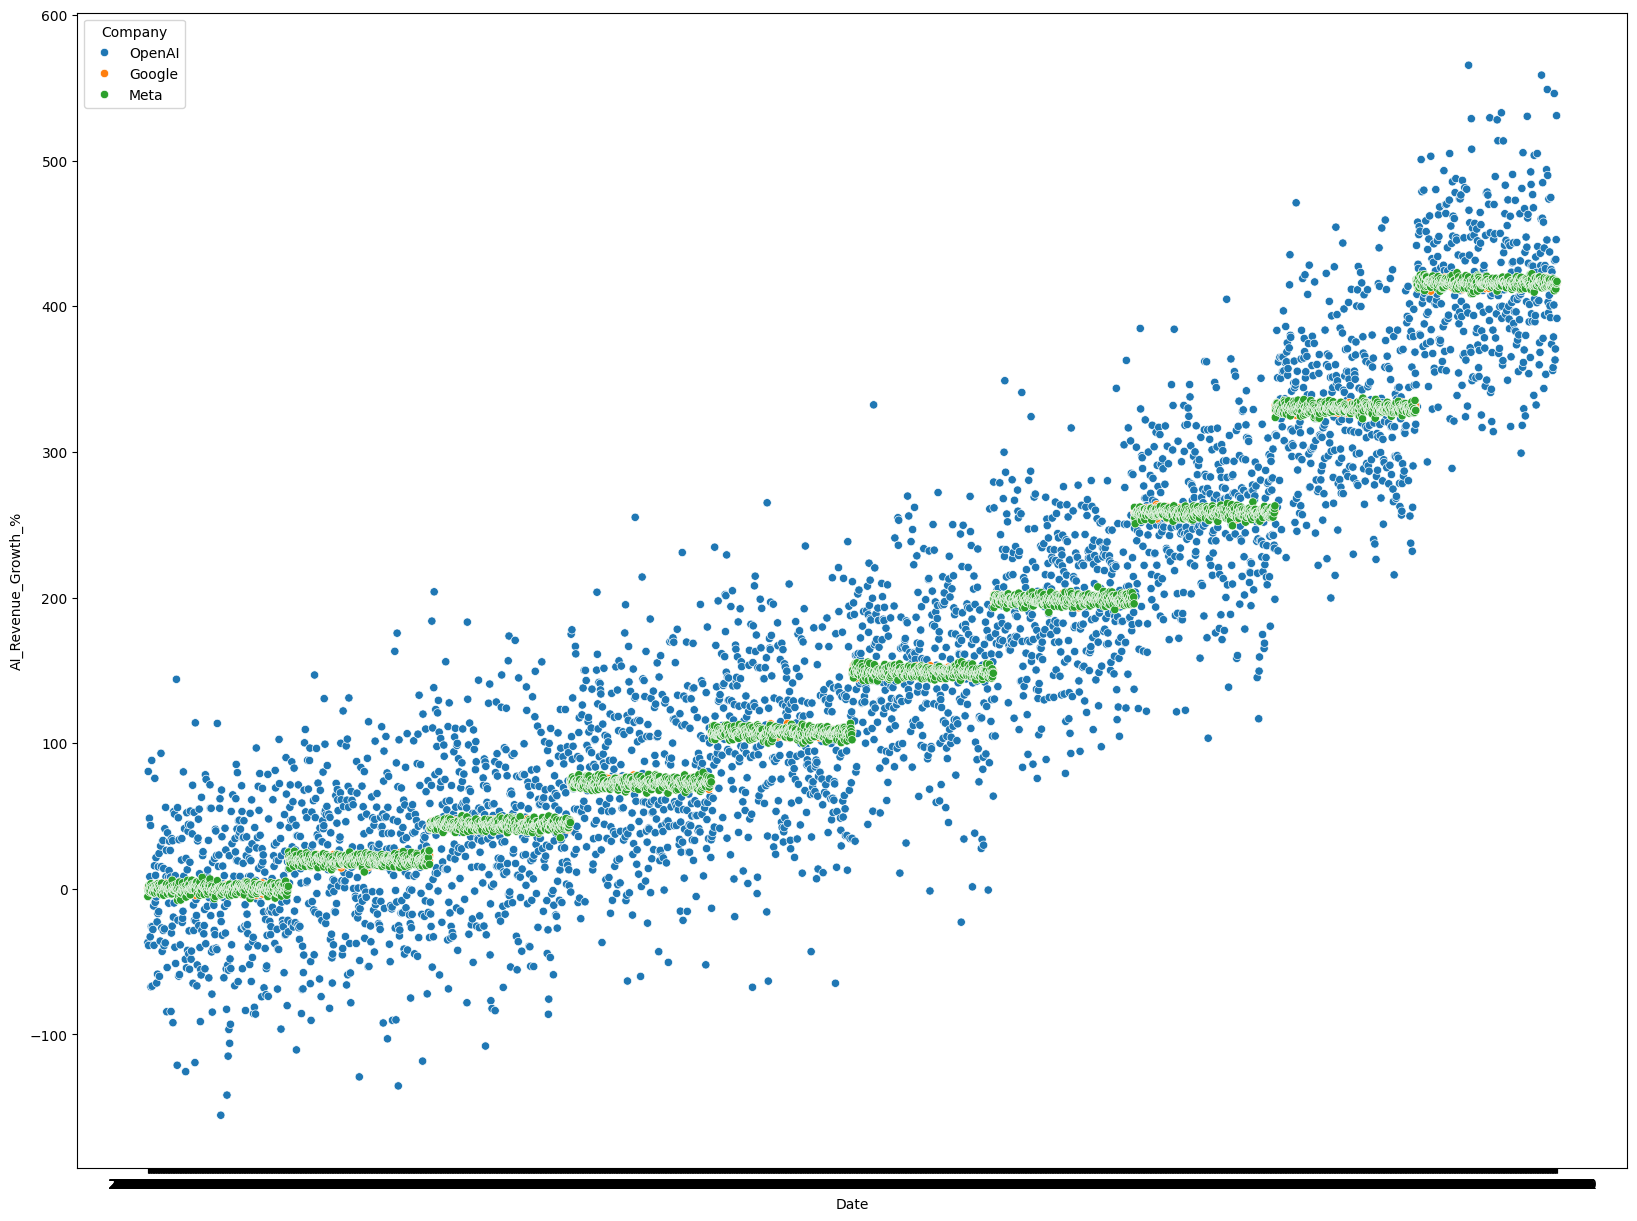

In [37]:
plt.figure(figsize = (20,15))

sns.scatterplot(x = 'Date', y = 'AI_Revenue_Growth_%', data = df, hue = 'Company')

plt.show()

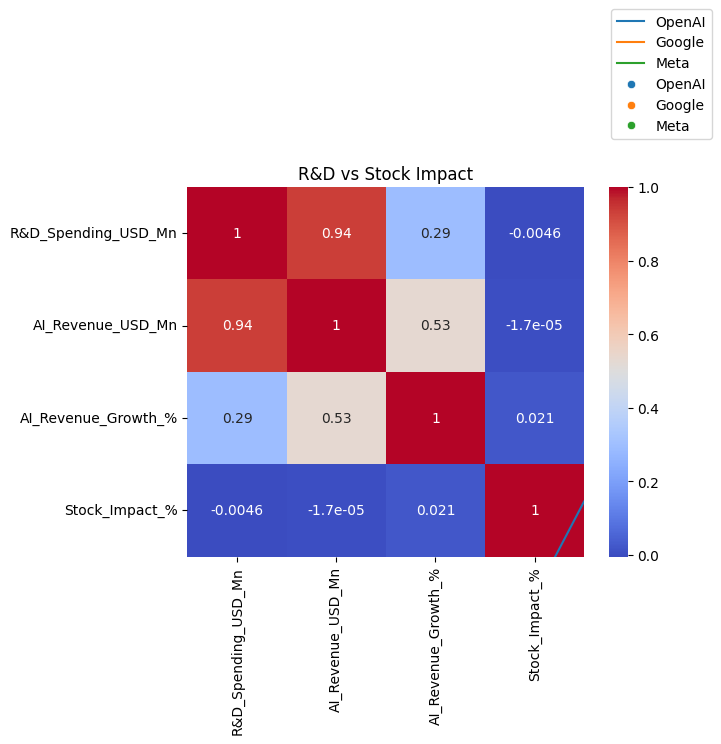

In [38]:
sns.lineplot(data=df, x="Date", y="R&D_Spending_USD_Mn", hue="Company")
plt.title("R&D Spending Over Time")

sns.scatterplot(data=df, x="R&D_Spending_USD_Mn", y="Stock_Impact_%", hue="Company")
plt.title("R&D vs Stock Impact")

sns.heatmap(df[['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn',
                'AI_Revenue_Growth_%','Stock_Impact_%']].corr(),
            annot=True, cmap="coolwarm")
plt.legend(bbox_to_anchor=(1.05, 1.5), loc='upper left')

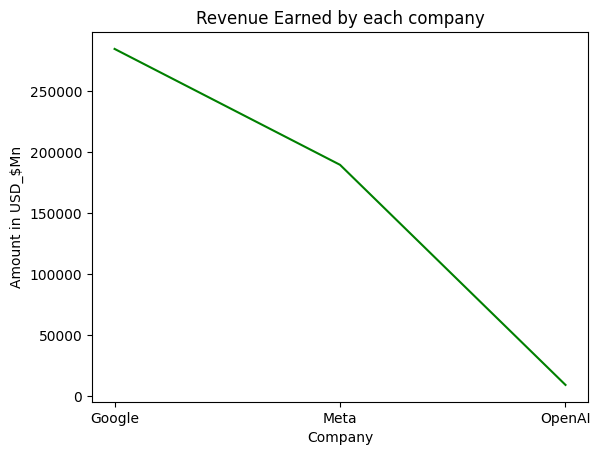

In [39]:
plt.plot( revenue.index, revenue.values, color = 'g')

plt.title( "Revenue Earned by each company")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Mn")

plt.show()

In [40]:
spendings = df.groupby('Company')['R&D_Spending_USD_Mn'].sum()

spendings

,R&D_Spending_USD_Mn
Company,
Google,423341.14
Meta,264533.07
OpenAI,26482.77


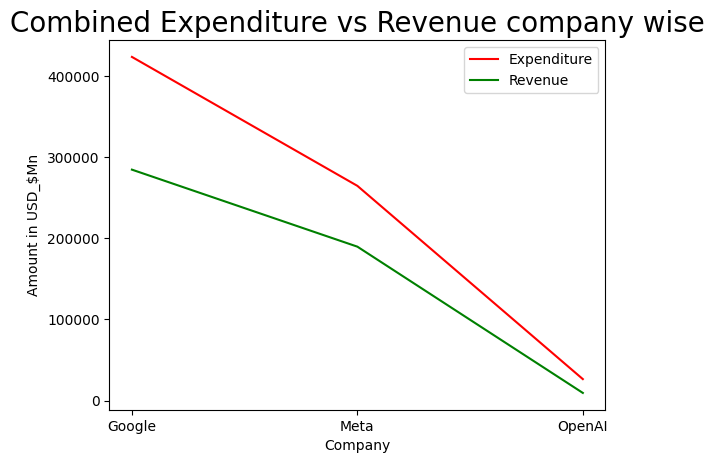

In [41]:
plt.plot(spendings.index, spendings.values, color = 'r')
plt.plot( revenue.index, revenue.values, color = 'g')

plt.title( "Combined Expenditure vs Revenue company wise", fontsize = 20)
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Mn")

plt.legend(['Expenditure', 'Revenue'])

plt.show()

Year wise analysis

In [42]:
df['Date'] = pd.to_datetime(df['Date'])

In [43]:
df['Year'] = df['Date'].dt.year

In [44]:
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,2024


Prediction

In [45]:
ggl = df[df["Company"]=="Google"]
meta = df[df["Company"]=="Meta"]
openai = df[df["Company"]=="OpenAI"]

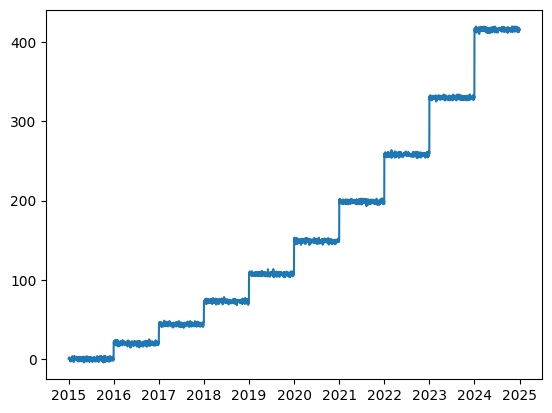

In [46]:
plt.plot( ggl['Date'], ggl['AI_Revenue_Growth_%'])

plt.show()

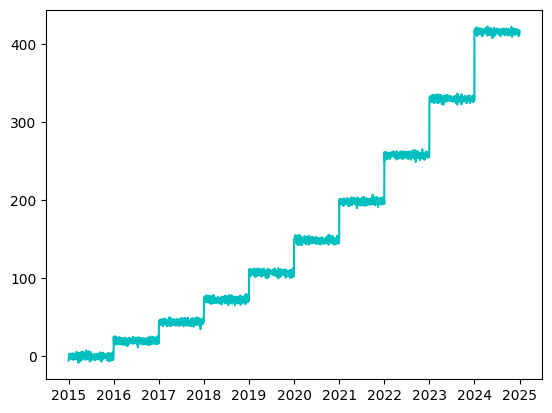

In [47]:
plt.plot( meta['Date'], meta['AI_Revenue_Growth_%'], color = 'c')

plt.show()

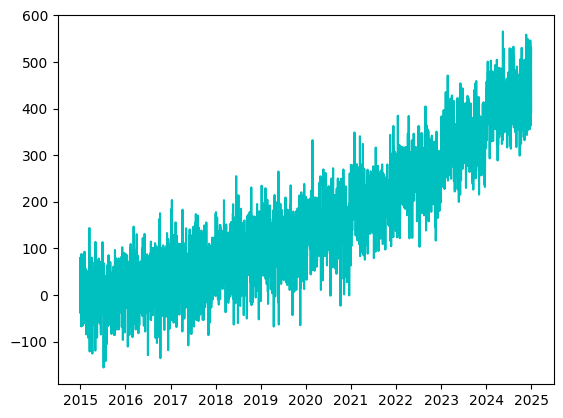

In [48]:
plt.plot( openai['Date'], openai['AI_Revenue_Growth_%'], color = 'c')

plt.show()

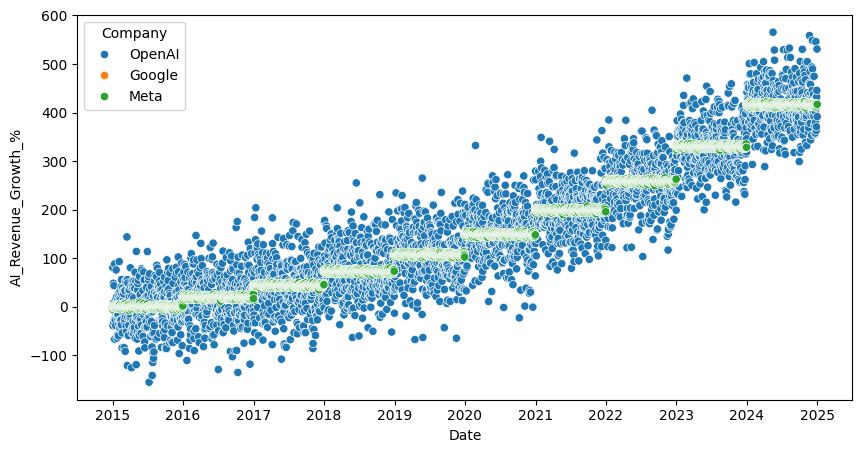

In [49]:
plt.figure(figsize = (10,5))

sns.scatterplot(x = 'Date', y = 'AI_Revenue_Growth_%', data = df, hue = 'Company')

plt.show()

In [50]:
df

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015
...,...,...,...,...,...,...,...,...
10954,2024-12-27,Meta,100.19,103.54,417.68,NaN,-0.66,2024
10955,2024-12-28,Meta,99.12,102.37,411.86,NaN,-0.57,2024
10956,2024-12-29,Meta,98.95,103.11,415.54,NaN,-0.52,2024
10957,2024-12-30,Meta,100.74,103.21,416.03,NaN,0.22,2024


In [51]:
features = ["R&D_Spending_USD_Mn", "AI_Revenue_USD_Mn", "AI_Revenue_Growth_%"]
X = df[features]
y = df["Stock_Impact_%"]


In [52]:
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


market data

In [53]:
import yfinance as yf

nasdaq = yf.download("^IXIC", start="2015-01-01", end="2024-12-31")

nasdaq.columns = nasdaq.columns.get_level_values(0)

nasdaq = nasdaq[['Close']].rename(columns={'Close': 'Nasdaq_Close'})

nasdaq['Market_Return'] = nasdaq['Nasdaq_Close'].pct_change()

nasdaq.reset_index(inplace=True)

df = df.merge(nasdaq[['Date', 'Market_Return']], on="Date", how="left")

df.head()


/tmp/ipython-input-720178772.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nasdaq = yf.download("^IXIC", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year,Market_Return
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015,NaN
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015,NaN
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015,NaN
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015,NaN
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015,-0.015706


In [54]:
df['RD_Intensity'] = df['R&D_Spending_USD_Mn'] / (df['AI_Revenue_USD_Mn'] + 1)

In [55]:

df['RD_Lag1'] = df.groupby('Company')['R&D_Spending_USD_Mn'].shift(1)
df['Revenue_Lag1'] = df.groupby('Company')['AI_Revenue_USD_Mn'].shift(1)


In [56]:

def rolling_corr(x, window=90):
    return x['R&D_Spending_USD_Mn'].rolling(window).corr(x['Stock_Impact_%'])

df['Rolling_Corr'] = df.groupby('Company', group_keys=False).apply(rolling_corr)


/tmp/ipython-input-2896632255.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['Rolling_Corr'] = df.groupby('Company', group_keys=False).apply(rolling_corr)


R2: 0.8439164540986681
MSE: 0.08767493408248929


<Axes: title={'center': 'Feature Importance'}>

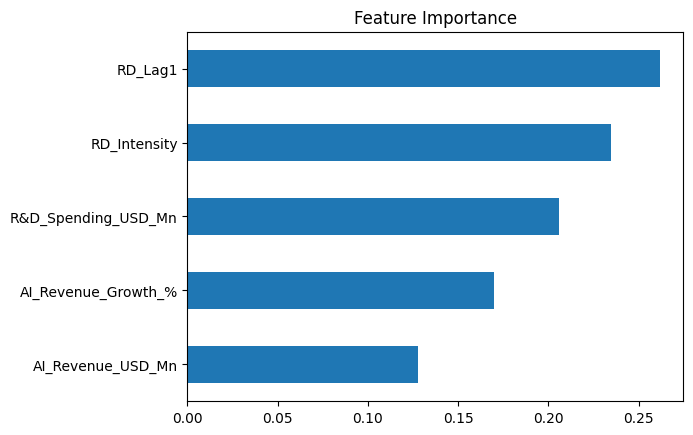

In [57]:

features = ['R&D_Spending_USD_Mn','AI_Revenue_USD_Mn',
            'AI_Revenue_Growth_%','RD_Intensity','RD_Lag1']
X = df[features].fillna(0)
y = df['Stock_Impact_%']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestRegressor(random_state=42)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)
print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

# Feature importance
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', title="Feature Importance")


Text(0.5, 1.0, 'Portfolio Backtest: High vs Low R&D Firms')

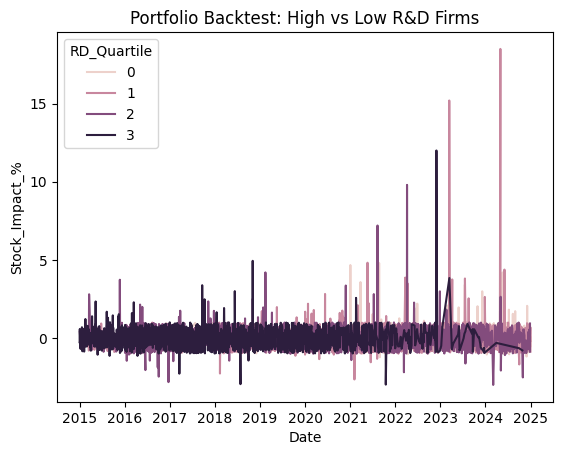

In [58]:

df['RD_Quartile'] = pd.qcut(df['RD_Intensity'], 4, labels=False)

portfolio_returns = (
    df.groupby(['Date','RD_Quartile'])['Stock_Impact_%']
    .mean().reset_index()
)

sns.lineplot(data=portfolio_returns, x="Date", y="Stock_Impact_%", hue="RD_Quartile")
plt.title("Portfolio Backtest: High vs Low R&D Firms")


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
X = df[['R&D_Spending_USD_Mn', 'AI_Revenue_Growth_%']]
y = df['Stock_Impact_%']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


y_pred = lin_reg.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R2: -0.000288870880998493
RMSE: 0.5173755076973127


backtesting strategy

In [63]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

portfolio_returns = []
market_returns = []

for year, group in df.groupby('Year'):
    top_spenders = group.sort_values('R&D_Spending_USD_Mn', ascending=False).head(3)
    portfolio_return = top_spenders['Stock_Impact_%'].mean()
    market_return = group['Market_Return'].mean()

    portfolio_returns.append(portfolio_return)
    market_returns.append(market_return)

results = pd.DataFrame({'Year': df['Year'].unique(),
                        'Portfolio': portfolio_returns,
                        'Market': market_returns})
print(results)


   Year  Portfolio    Market
0  2015   0.460000  0.000286
1  2016  -0.226667  0.000337
2  2017   0.410000  0.001010
3  2018  -0.206667 -0.000071
4  2019   0.026667  0.001247
5  2020  -0.833333  0.001684
6  2021  -0.333333  0.000834
7  2022   0.480000 -0.001398
8  2023   0.206667  0.001503
9  2024  -0.330000  0.001105


In [64]:
import numpy as np

portfolio_sharpe = results['Portfolio'].mean() / results['Portfolio'].std()
market_sharpe = results['Market'].mean() / results['Market'].std()

print("Portfolio Sharpe:", portfolio_sharpe)
print("Market Sharpe:", market_sharpe)


Portfolio Sharpe: -0.0809626907544126
Market Sharpe: 0.7174686523135432


In [66]:
cumulative_portfolio = (1 + pd.Series(portfolio_returns)).cumprod()
cumulative_market = (1 + pd.Series(market_returns)).cumprod()

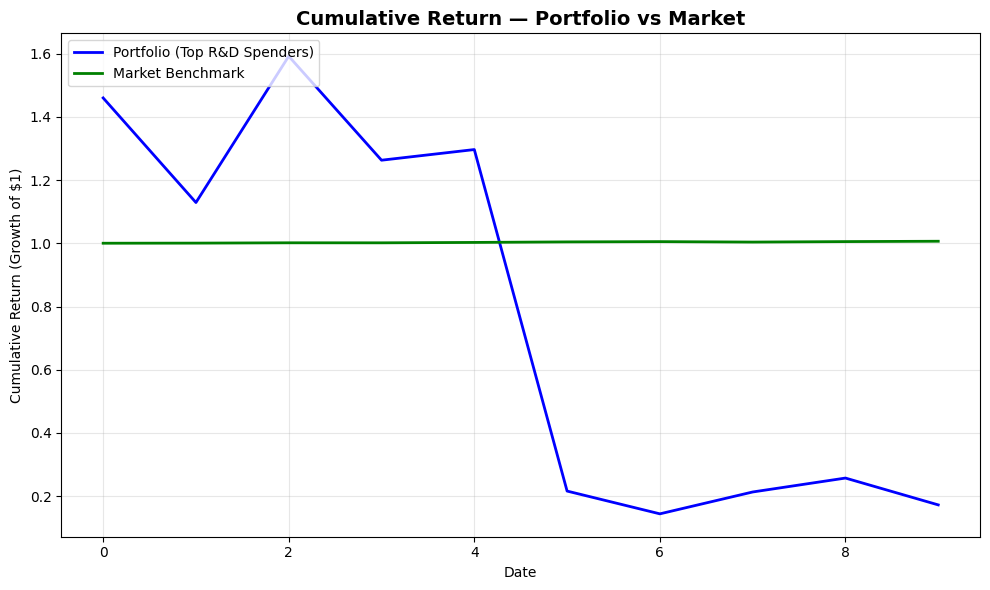

In [67]:
plt.figure(figsize=(10,6))
plt.plot(cumulative_portfolio, label="Portfolio (Top R&D Spenders)", linewidth=2, color="blue")
plt.plot(cumulative_market, label="Market Benchmark", linewidth=2, color="green")

plt.title("Cumulative Return — Portfolio vs Market", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Growth of $1)")
plt.legend(loc="upper left", fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()